# Required Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/home/hassan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# The Perceptron Function

In [2]:

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100, activation_function='sigmoid'):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.activation_function = activation_function
    
    def activation(self, x):
        if self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation_function == 'tanh':
            return np.tanh(x)
        else:
            return np.where(x >= 0, 1, 0)  
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation(linear_output)
        return y_predicted



# Creating a dataset


In [4]:
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
perceptron_step = Perceptron(activation_function='step')
perceptron_sigmoid = Perceptron(activation_function='sigmoid')
perceptron_tanh = Perceptron(activation_function='tanh')

perceptron_step.fit(X, y)
perceptron_sigmoid.fit(X, y)
perceptron_tanh.fit(X, y)

# Plotting Decision Boundaries

In [6]:

def plot_decision_boundaries(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.show()


# Decision Boundaries with Different Avtivation Functions

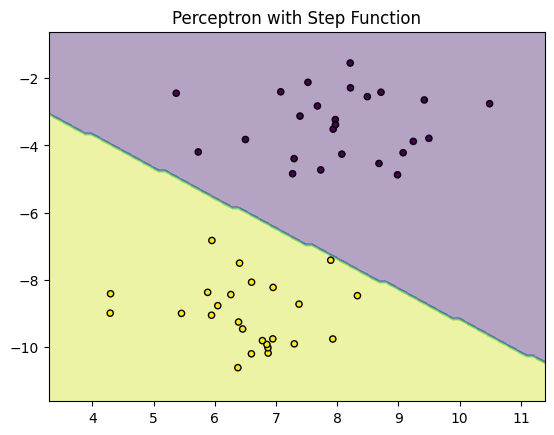

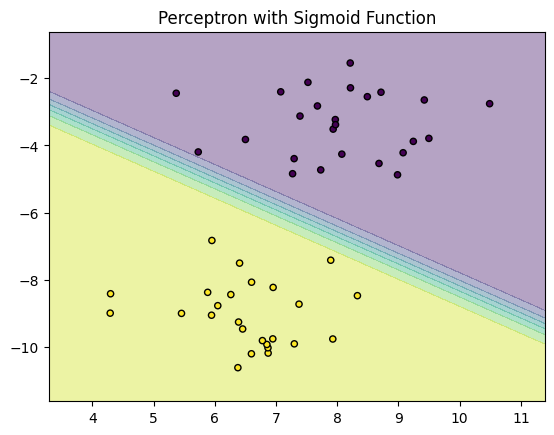

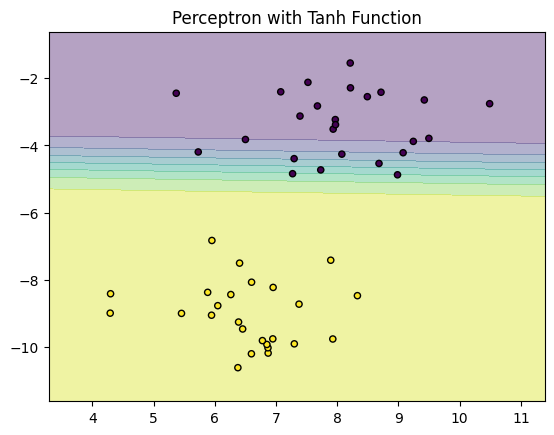

In [7]:

plot_decision_boundaries(perceptron_step, X, y, 'Perceptron with Step Function')
plot_decision_boundaries(perceptron_sigmoid, X, y, 'Perceptron with Sigmoid Function')
plot_decision_boundaries(perceptron_tanh, X, y, 'Perceptron with Tanh Function')